# XORD TASK

## 1.

We have to predict car mpg and passed emission, in the given dataset, mpg column contain continues values while on the other hand passed emission contain categorical data, mpg is regression problem while emission is classification problem.
We have created two models for two different problems.

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df=pd.read_csv("cars.csv")
print(df.head(5))


  passedemissions   mpg  displacement  horsepower  cylinders  weight  \
0           False  18.0         307.0       130.0        8.0  1.7520   
1           False  15.0         350.0       165.0        8.0  1.8465   
2           False  18.0         318.0       150.0        8.0  1.7180   
3           False  16.0         304.0       150.0        8.0  1.7165   
4           False  17.0         302.0       140.0        8.0  1.7245   

   acceleration  modelyear                    carname  
0          12.0       70.0  chevrolet chevelle malibu  
1          11.5       70.0          buick skylark 320  
2          11.0       70.0         plymouth satellite  
3          12.0       70.0              amc rebel sst  
4          10.5       70.0                ford torino  


## Data Pre-Processing

In [108]:
print(df.info())
print(df.isnull().values.any())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 9 columns):
passedemissions    392 non-null object
mpg                392 non-null float64
displacement       392 non-null float64
horsepower         392 non-null float64
cylinders          392 non-null float64
weight             392 non-null float64
acceleration       392 non-null float64
modelyear          392 non-null float64
carname            392 non-null object
dtypes: float64(7), object(2)
memory usage: 27.7+ KB
None
True


In [109]:
print(df.describe())

              mpg  displacement  horsepower   cylinders      weight  \
count  392.000000    392.000000  392.000000  392.000000  392.000000   
mean    23.445918    194.411990  104.469388    5.471939    1.488792   
std      7.805007    104.644004   38.491160    1.705783    0.424701   
min      9.000000     68.000000   46.000000    3.000000    0.806500   
25%     17.000000    105.000000   75.000000    4.000000    1.112625   
50%     22.750000    151.000000   93.500000    4.000000    1.401750   
75%     29.000000    275.750000  126.000000    8.000000    1.807375   
max     46.600000    455.000000  230.000000    8.000000    2.570000   

       acceleration   modelyear  
count    392.000000  392.000000  
mean      15.541327   75.979592  
std        2.758864    3.683737  
min        8.000000   70.000000  
25%       13.775000   73.000000  
50%       15.500000   76.000000  
75%       17.025000   79.000000  
max       24.800000   82.000000  


This graph shows that our data set contain Null value in last tuple(zoom in for clear vision)

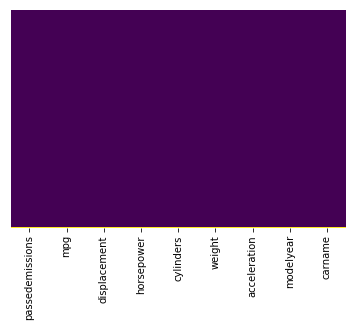

In [110]:
df.columns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
          

In [111]:
print(df.tail())
df=df[:-1]
print(df.tail())

    passedemissions   mpg  displacement  horsepower  cylinders  weight  \
388            True  44.0          97.0        52.0        4.0  1.0650   
389            True  32.0         135.0        84.0        4.0  1.1475   
390            True  28.0         120.0        79.0        4.0  1.3125   
391            True  31.0         119.0        82.0        4.0  1.3600   
392             NaN   NaN           NaN         NaN        NaN     NaN   

     acceleration  modelyear        carname  
388          24.6       82.0      vw pickup  
389          11.6       82.0  dodge rampage  
390          18.6       82.0    ford ranger  
391          19.4       82.0     chevy s-10  
392           NaN        NaN            NaN  
    passedemissions   mpg  displacement  horsepower  cylinders  weight  \
387            True  27.0         140.0        86.0        4.0  1.3950   
388            True  44.0          97.0        52.0        4.0  1.0650   
389            True  32.0         135.0        84.0      

We build a new data frame, named as 'df_new', in which we copy orignal data frame excluding null values,and the column 'carname', which in our opinion didn't effect the model.
Additionally, we changed 'passedemission' column into (0,1) for efficient working. 

In [112]:

df['passedemissions'] = (df['passedemissions'] == True).astype(int)

#print(df.head(5))

df_new=df[['passedemissions', 'mpg', 'displacement', 'horsepower', 'cylinders',
       'weight', 'acceleration', 'modelyear']]
print(df_new.head())


   passedemissions   mpg  displacement  horsepower  cylinders  weight  \
0                0  18.0         307.0       130.0        8.0  1.7520   
1                0  15.0         350.0       165.0        8.0  1.8465   
2                0  18.0         318.0       150.0        8.0  1.7180   
3                0  16.0         304.0       150.0        8.0  1.7165   
4                0  17.0         302.0       140.0        8.0  1.7245   

   acceleration  modelyear  
0          12.0       70.0  
1          11.5       70.0  
2          11.0       70.0  
3          12.0       70.0  
4          10.5       70.0  


#### Finding Co-relation 

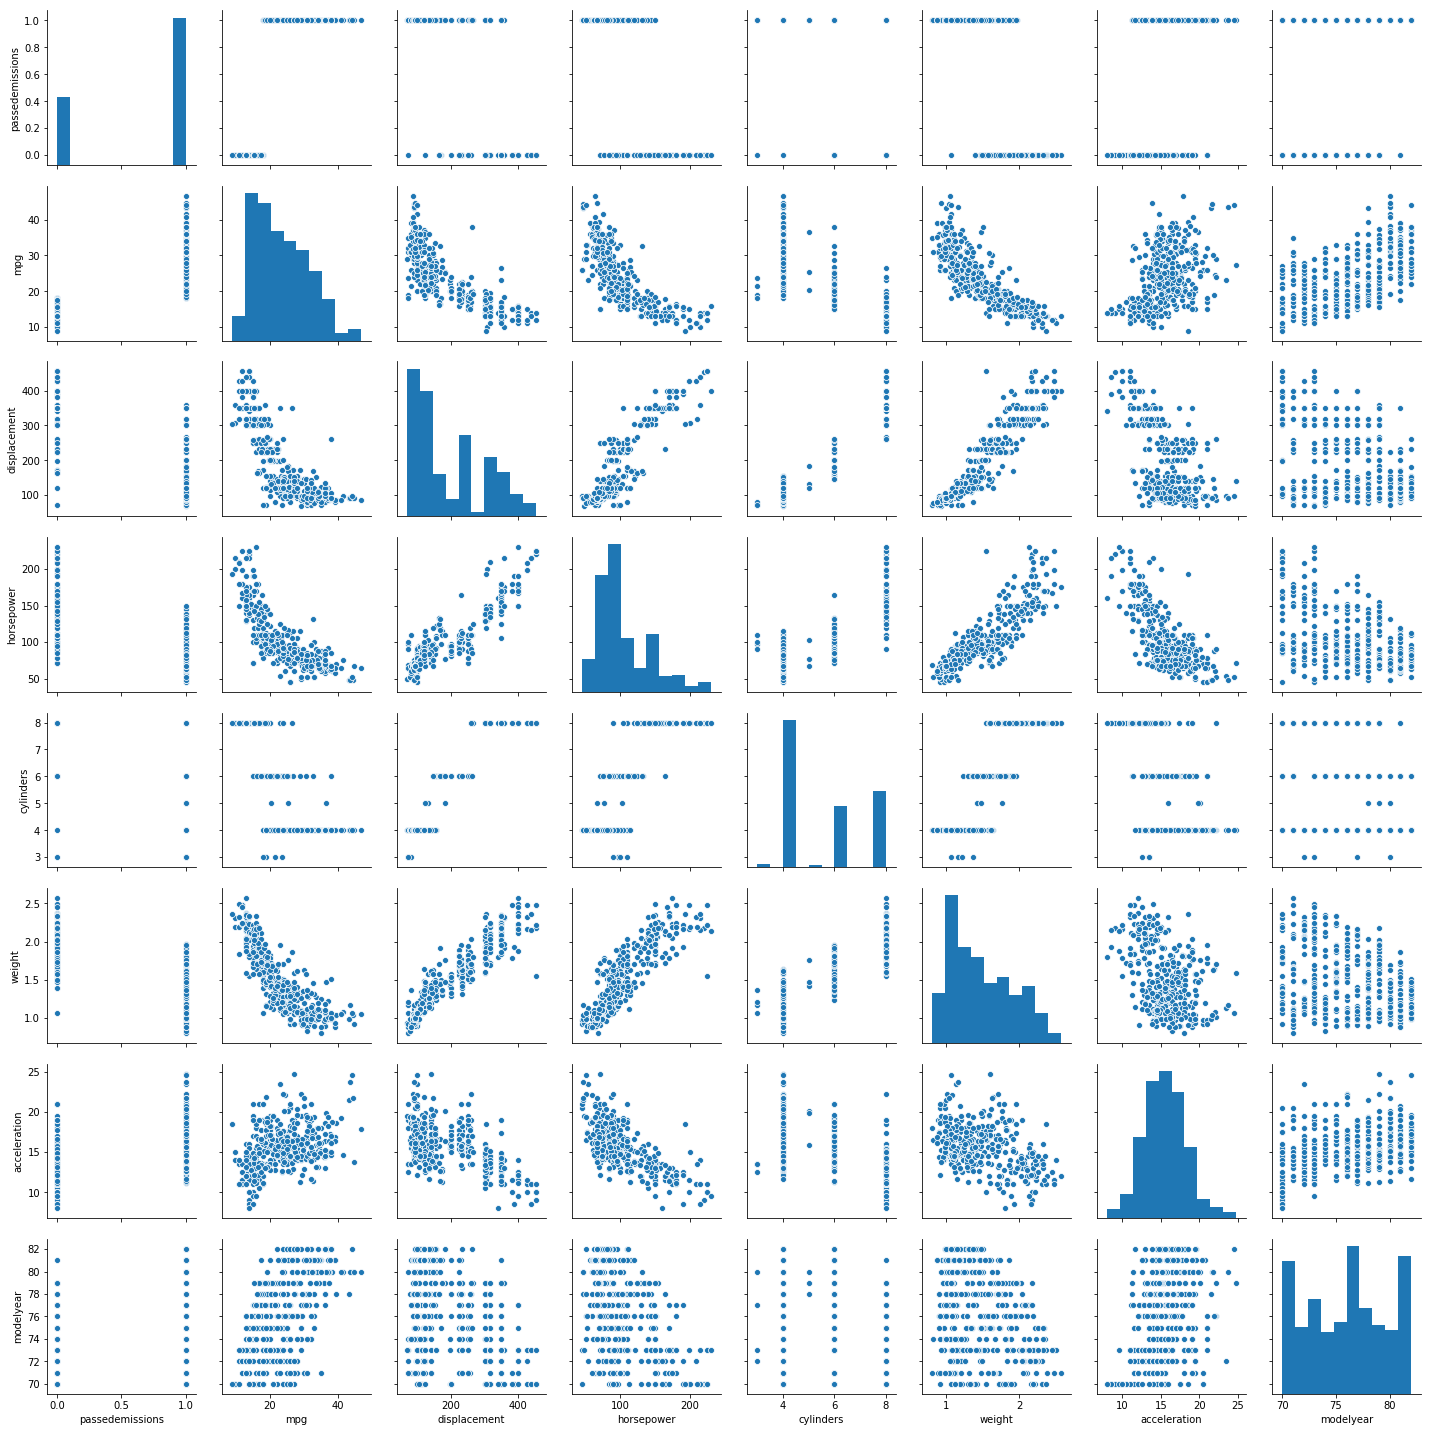

In [113]:

sns.pairplot(df_new)

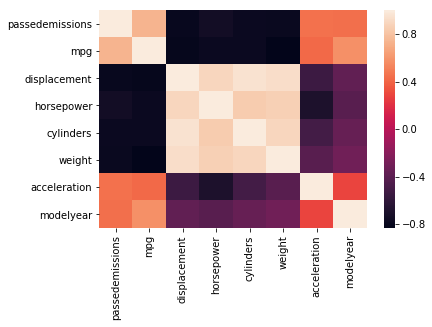

In [114]:
corr = df_new.corr()
sns.heatmap(corr)
plt.show()

In [115]:
print(df_new['mpg'].max())
print(df_new['mpg'].min())
df_new['mpg'].median()

46.6
9.0


22.75

Null values checked by Heat Map

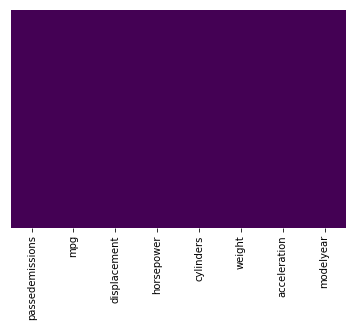

In [116]:
df_new.columns
sns.heatmap(df_new.isnull(),yticklabels=False,cbar=False,cmap='viridis')
          

## Model Building For 'mpg'

In [135]:
from sklearn.model_selection import train_test_split

X=df_new.drop('mpg',axis=1)
y=df_new['mpg']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
actual_y = y_test 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model


reg=LinearRegression()
rr=Ridge()
la=linear_model.Lasso(alpha=0.5)

## Model Fitting

In [136]:

reg.fit(X_train,y_train)
rr.fit(X_train,y_train)
la.fit(X_train,y_train)



pred_ridge=rr.predict(X_test)
predictions=reg.predict(X_test)
pred_lasso=la.predict(X_test)

### Scatter Plot created By Linear,Lasso and Ridge Regression Models 

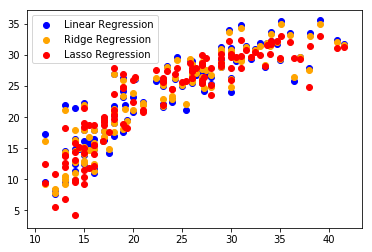

In [119]:
plt.scatter(y_test,predictions,color='blue',label='Linear Regression')
plt.scatter(y_test,pred_ridge,color='orange',label='Ridge Regression')
plt.scatter(y_test,pred_lasso,color='red',label='Lasso Regression')
plt.legend()

### Distplot by Linear Regression

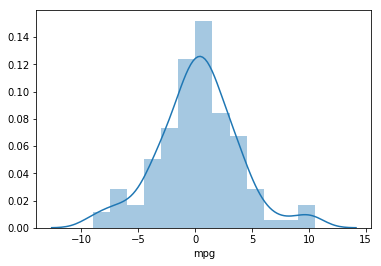

In [120]:

sns.distplot((y_test-predictions))

### Distplot by Ridge Regression

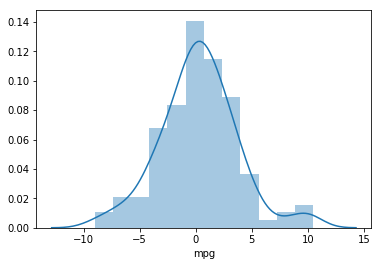

In [121]:
sns.distplot((y_test-pred_ridge))

### Distplot by  Lasso Regression

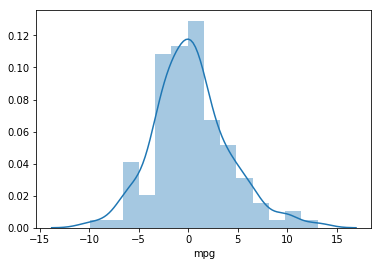

In [122]:
sns.distplot((y_test-pred_lasso))

The above displot shows that Linear regression is giving better result

### Histogram and Scatter Plot for checking outliers

(array([13., 78., 73., 58., 53., 48., 37., 22.,  4.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <a list of 10 Patch objects>)

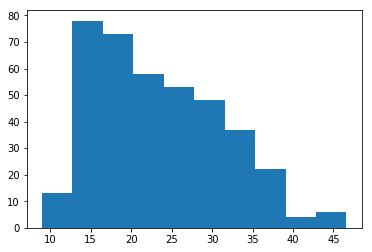

In [123]:
plt.hist(df_new['mpg'])

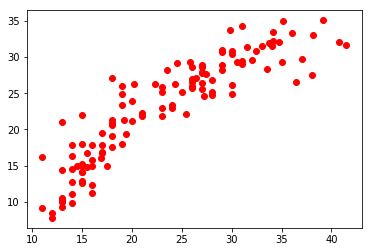

In [124]:
plt.scatter(y_test,pred_ridge,color='red')

### Error Calculation
#### Root Mean Square Error and Mean Absolute Error By Each Model

In [125]:
##error
import numpy as np
from sklearn import metrics
print('Root Mean Square Error By Linear Regression: ')
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('Mean Absolute Error By Linear Regression: ')
print(metrics.mean_absolute_error(y_test,predictions))

Root Mean Square Error By Linear Regression: 
3.59913547470041
Mean Absolute Error By Linear Regression: 
2.6988080344381284


In [126]:
print('Root Mean Square Error By Ridget Regression: ')
print(np.sqrt(metrics.mean_squared_error(y_test,pred_ridge)))
print('Mean Absolute Error By Ridget Regression: ')
print(metrics.mean_absolute_error(y_test,pred_ridge))

Root Mean Square Error By Ridget Regression: 
3.4620720344907725
Mean Absolute Error By Ridget Regression: 
2.584262689911393


In [127]:
print('Root Mean Square Error By Lasso Regression: ')
print(np.sqrt(metrics.mean_squared_error(y_test,pred_lasso)))
print('Mean Absolute Error By Lasso Regression: ')
print(metrics.mean_absolute_error(y_test,pred_lasso))

Root Mean Square Error By Lasso Regression: 
3.818005819178393
Mean Absolute Error By Lasso Regression: 
2.8583781307444283


## Model Building For PassedEmission Using Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression

X=df_new.drop('passedemissions',axis=1)
y=df_new['passedemissions']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

lg=LogisticRegression()
lg.fit(X_train,y_train)
pred=lg.predict(X_test)


C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [129]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

results = confusion_matrix(y_test, pred)
accuracy=accuracy_score(y_test, pred)
report=classification_report(y_test, pred) 
print(results)
print(accuracy)
print('\n')
print(report)

[[30  3]
 [ 4 81]]
0.940677966101695


              precision    recall  f1-score   support

           0       0.88      0.91      0.90        33
           1       0.96      0.95      0.96        85

   micro avg       0.94      0.94      0.94       118
   macro avg       0.92      0.93      0.93       118
weighted avg       0.94      0.94      0.94       118



Model is working with good accuracy

## 2.

## Fuel Efficiency

In [130]:
len(predictions)
plist=[]
for e in predictions:
    if e >=30:
        plist.append('high')
    elif e<30 and e>=22:
        plist.append('medium')
    else:
        plist.append('low')

    
        

In [139]:
import numpy as np
df_chk=pd.DataFrame()
df_chk['actual']=actual_y
df_chk['predicted']=predictions
df_chk['Fuel Consumption'] = plist
df_chk.set_index(np.arange(0,118)).head()

,actual,predicted,Fuel Consumption
0,24.3,26.885120,medium
1,25.8,29.688565,low
2,21.0,24.462357,high
3,19.0,22.726770,medium
4,18.0,19.741047,low


## 3.

1. Data shows class imbalance, which can be over come by differnt techniques like oversampling of data
2. More the data model will be more accuarate
3. By implementing different models and checking thier accuracy as we have done in predicting 'mpg' and select the more            accurate one.
4. By worikng on ouliers (if any)

## 4.

As we have already discussed, We used linear regression for mpg predictions and logistic regression for passed emission prediction because mpg contain continous values which was best predicted by linear regression, we have checked by calculating errors above, further we used logistic regression for passed emission prediction because it contains categorical data and logistic regression was predicting almost perfect.

For further confirmation we can see scatter plots,heatmaps and histograms plotted above. 